In [1]:
import matplotlib.pyplot as pyp
import numpy as np
import datetime
import pandas as pd

In [39]:
file = '/home/radio/data/rnog/2022/specanalyzer_2022-05-29_14-20-25.hdf5'
head = pd.read_hdf(file, key='header')
spectra = pd.read_hdf(file, key='spectra')
#spectra = head.keys()
nspectra = len(spectra.keys())
npoints = head[0].npoints
rbw_hz = head[0].rbw_hz
print(nspectra, npoints)

1000 1001


In [41]:
datestrf = '%d/%m/%Y %H:%M:%S'
timestamps = [head[i].date for i in range(nspectra)]
datetimestamps = [datetime.datetime.strptime(ts, datestrf) for ts in timestamps]

Text(0,0.5,'Power (dBm)')

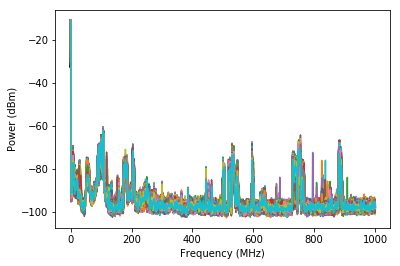

In [48]:
pyp.figure()
for i in range(0,nspectra, 1):
    freq = spectra[i].freq_hz
    pyp.plot(freq/1e6, spectra[i].power_dBm)
    
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Power (dBm)")
pyp.title("Power Spectrum")

Text(0.5,1,'Power Spectral Density')

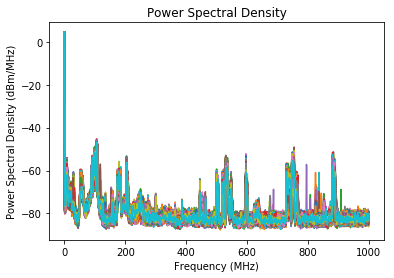

In [56]:
pyp.figure()
for i in range(0,nspectra, 1):
    freq = spectra[i].freq_hz
    pyp.plot(freq/1e6, spectra[i].power_dBm - 10.*np.log10(rbw_hz/1e6))
    
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Power Spectral Density (dBm/MHz)")
pyp.title("Power Spectral Density")

In [57]:
starttime = datetimestamps[0]
tdelta = np.zeros(len(datetimestamps))
for i,ts in enumerate(datetimestamps):
    tdelta[i] = (ts - starttime).total_seconds()

spectrogram = np.zeros( (nspectra, npoints))
print(np.shape(spectrogram))
for i in range(nspectra):
    timestamp = timestamps[i]
    spec = spectra[i].power_dBm
    spectrogram[i,:] = spec
    
freq = spectra[i].freq_hz    
freqmesh, timemesh = np.meshgrid(freq/1e6, tdelta)

(1000, 1001)


Text(0.5,1,'29/05/2022 14:20:26')

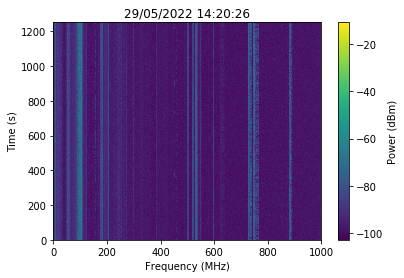

In [58]:
pyp.pcolormesh(freqmesh,timemesh, spectrogram)
cbar = pyp.colorbar()
cbar.set_label("Power (dBm)")
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Time (s)")
pyp.title(starttime.strftime(format=datestrf))

Text(0.5,1,'29/05/2022 14:20:26')

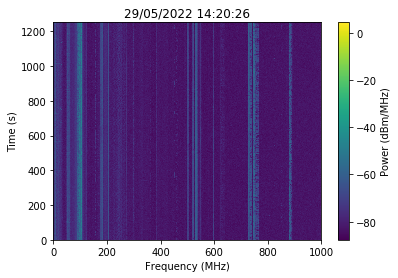

In [59]:
pyp.pcolormesh(freqmesh,timemesh, spectrogram-10*np.log10(rbw_hz/1e6))
cbar = pyp.colorbar()
cbar.set_label("Power (dBm/MHz)")
pyp.xlabel("Frequency (MHz)")
pyp.ylabel("Time (s)")
pyp.title(starttime.strftime(format=datestrf))